## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
import os
from tomo2mesh.projects.steel_am.rw_utils import *
import seaborn as sns
import pandas as pd

In [2]:
sns.set(font_scale=1.2)
sns.set_style(style='white')

In [3]:
def get_histograms(vol_name):

    if vol_name == "2k":
        b = 2
        pixel_size = 2.34
    elif vol_name == "4k":
        b = 4
        pixel_size = 1.17
    
    x = lambda fname : np.cbrt(list(pd.read_csv(os.path.join(voids_dir,f"sizes_{vol_name}_b_{b}_" + fname))["sizes"]))*pixel_size
    sdict = {}
    sdict.update({"cyl" : x("cylindrical_neighborhood.csv")})
    sdict.update({"sph" : x("spherical_neighborhood.csv")})
    sdict.update({"all" : x("all_geq_14um.csv")})    
    sdict["all"] = sdict["all"][sdict["all"] > 14.0]
    return sdict

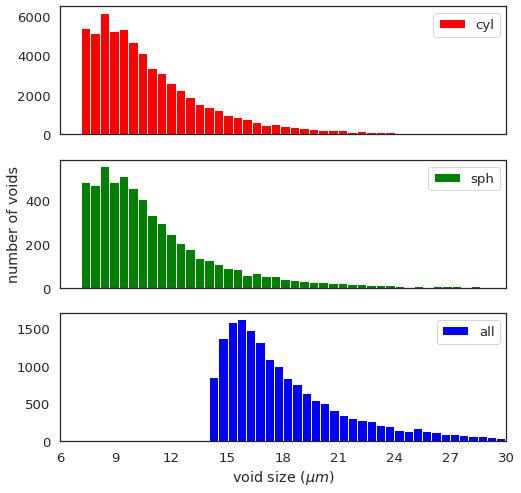

In [4]:
sdict = get_histograms("2k")
fig, ax = plt.subplots(3,1,figsize = (8,8), sharex = True, sharey = False)
colors = ["red", "green", "blue"]
for idx, key in enumerate(sdict.keys()):
    _ = ax[idx].hist(sdict[key], bins = 500, density = False, color = colors[idx], label = key, alpha = 1)


ax[0].set_xlim([3*2.34,30])
# ax.legend()
ax[2].set_xlabel("void size (${\mu{m}}$)")
ax[1].set_ylabel("number of voids")
ax[0].set_xticks(np.linspace(6,30,9,endpoint=True))
[ax[i3].legend() for i3 in range(3)]

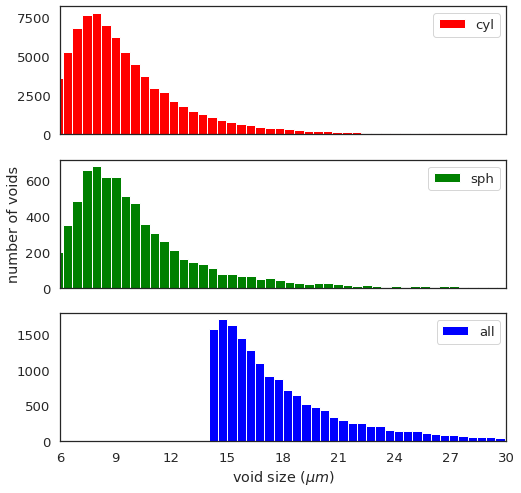

In [5]:
sdict = get_histograms("4k")
fig, ax = plt.subplots(3,1,figsize = (8,8), sharex = True, sharey = False)
colors = ["red", "green", "blue"]
for idx, key in enumerate(sdict.keys()):
    _ = ax[idx].hist(sdict[key], bins = 500, density = False, color = colors[idx], label = key, alpha = 1)


ax[0].set_xlim([3*2.34,30])
# ax.legend()
ax[2].set_xlabel("void size (${\mu{m}}$)")
ax[1].set_ylabel("number of voids")
ax[0].set_xticks(np.linspace(6,30,9,endpoint=True))
[ax[i3].legend() for i3 in range(3)]

In [ ]:
# fig, ax = plt.subplots(1,1,figsize = (8,8))
# colors = ["red", "green", "blue"]
# for idx, key in enumerate(sdict.keys()):
#     _ = ax.hist(sdict[key], bins = 500, density = False, color = colors[idx], label = key, alpha = 1)


# ax.set_xlim([3*2.34,30])
# ax.legend()
# ax.set_xlabel("void size (${\mu{m}}$)")
# ax.set_ylabel("number of voids")
# ax.set_xticks(np.linspace(6,30,9,endpoint=True))